In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [28]:
df=pd.read_csv('movies.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [30]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [31]:
df.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [32]:
df.head(20)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


In [33]:
import re
# extract director and stars
def extract_info(text):
    director = None
    stars = None  
    # Extract director 
    if 'Director:' in text:
        director = re.search(r'Director:\n(.*?)\n\|', text)
        if director:
            director = director.group(1).strip()
    # Extract stars 
    if 'Stars:' in text:
        stars = re.search(r'Stars:\s*(.*)', text)
        if stars:
            stars = stars.group(1).strip()
    return director, stars
# create new columns 
df[['Director', 'Stars']] = df['STARS'].apply(lambda x: pd.Series(extract_info(x)))



# cleaning the data

In [35]:
df['YEAR'] = df['YEAR'].astype(str)
df['YEAR'] = df['YEAR'].str.extract(r'(\d{4})').astype(float)   #Extract the numbers from comma and convert it to float
df['GENRE']=df['GENRE'].str.strip()
df['ONE-LINE']=df['ONE-LINE'].str.strip()
df['STARS']=df['STARS'].str.strip()
#df=df['VOTES'].replace(',','')
df=df.drop(columns='STARS')
df=df.drop(columns='Gross')
#df['VOTES']=df['VOTES'].astype(float)


In [36]:
df.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Director,Stars
0,Blood Red Sky,2021.0,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,Peter Thorwarth,"Peri Baumeister,"
1,Masters of the Universe: Revelation,2021.0,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"17,870",25.0,None,"Chris Wood,"
2,The Walking Dead,2010.0,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"885,805",44.0,None,"Andrew Lincoln,"
3,Rick and Morty,2013.0,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"414,849",23.0,None,"Justin Roiland,"
4,Army of Thieves,2021.0,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",NaN,NaN,Matthias Schweighöfer,"Matthias Schweighöfer,"
5,Outer Banks,2020.0,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"25,858",50.0,None,"Chase Stokes,"
6,The Last Letter from Your Lover,2021.0,"Drama, Romance",6.8,A pair of interwoven stories set in the past a...,"5,283",110.0,Augustine Frizzell,"Shailene Woodley,"
7,Dexter,2006.0,"Crime, Drama, Mystery",8.6,"By day, mild-mannered Dexter is a blood-spatte...","665,387",53.0,None,"Michael C. Hall,"
8,Never Have I Ever,2020.0,Comedy,7.9,The complicated life of a modern-day first gen...,"34,530",30.0,None,"Maitreyi Ramakrishnan,"
9,Virgin River,2019.0,"Drama, Romance",7.4,"Seeking a fresh start, nurse practitioner Meli...","27,279",44.0,None,"Alexandra Breckenridge,"


# inedtify the outlier and remove it 

In [38]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 3 * IQR
    upper = Q3 + 3 * IQR
    fdf = df[(df[column] >= lower) & (df[column] <= upper)]
    return fdf
columns = ['RATING', 'RunTime','YEAR']
for column in columns:
    df = outliers(df, column)


In [39]:
df.describe()

,YEAR,RATING,RunTime
count,6537.000000,6537.000000,6537.000000
mean,2016.306563,6.848952,66.405232
std,4.378505,1.250499,36.514738
min,1999.000000,1.800000,1.000000
25%,2015.000000,6.100000,37.000000
50%,2018.000000,7.000000,60.000000
75%,2019.000000,7.700000,94.000000
max,2021.000000,9.900000,267.000000


In [40]:
df.head(20)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Director,Stars
0,Blood Red Sky,2021.0,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,Peter Thorwarth,"Peri Baumeister,"
1,Masters of the Universe: Revelation,2021.0,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"17,870",25.0,None,"Chris Wood,"
2,The Walking Dead,2010.0,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"885,805",44.0,None,"Andrew Lincoln,"
3,Rick and Morty,2013.0,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"414,849",23.0,None,"Justin Roiland,"
5,Outer Banks,2020.0,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"25,858",50.0,None,"Chase Stokes,"
6,The Last Letter from Your Lover,2021.0,"Drama, Romance",6.8,A pair of interwoven stories set in the past a...,"5,283",110.0,Augustine Frizzell,"Shailene Woodley,"
7,Dexter,2006.0,"Crime, Drama, Mystery",8.6,"By day, mild-mannered Dexter is a blood-spatte...","665,387",53.0,None,"Michael C. Hall,"
8,Never Have I Ever,2020.0,Comedy,7.9,The complicated life of a modern-day first gen...,"34,530",30.0,None,"Maitreyi Ramakrishnan,"
9,Virgin River,2019.0,"Drama, Romance",7.4,"Seeking a fresh start, nurse practitioner Meli...","27,279",44.0,None,"Alexandra Breckenridge,"
10,Gunpowder Milkshake,2021.0,"Action, Adventure, Thriller",6.0,Three generations of women fight back against ...,"17,989",114.0,Navot Papushado,"Karen Gillan,"


In [41]:
df.isnull().sum() 

MOVIES         0
YEAR           0
GENRE          7
RATING         0
ONE-LINE       0
VOTES          0
RunTime        0
Director    2617
Stars        443
dtype: int64

In [42]:
# Replacing the Null values
df['GENRE']=df['GENRE'].fillna(df['GENRE'].mode()[0])
df['Director']=df['Director'].fillna('unknown')
df['Stars']=df['Stars'].fillna('unknown')


In [43]:
df['ONE-LINE'] = 'A movie about ' + df['GENRE'].astype(str).str.lower() #summerize one line coulmn

In [44]:
dff=pd.read_csv('rotten_tomatoes_top_movies.csv')

In [45]:
dff.head()

,Unnamed: 0,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,...,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew,link
0,0,Black Panther,2018,"After the death of his father, T'Challa return...",96,79.0,Black Panther elevates superhero cinema to thr...,519,"50,000+",Action & Adventure,...,"Feb 16, 2018 wide","May 2, 2018",$700.2M,2h 14m,Walt Disney Pictures,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",http://www.rottentomatoes.com/m/black_panther_...
1,1,Avengers: Endgame,2019,"Adrift in space with no food or water, Tony St...",94,90.0,"Exciting, entertaining, and emotionally impact...",538,"50,000+",Action & Adventure,...,"Apr 26, 2019 wide","Jul 30, 2019",$858.4M,3h 1m,"Marvel Studios, Walt Disney Pictures","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),Marvel Cinematic Universe,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",http://www.rottentomatoes.com/m/avengers_endgame
2,2,Mission: Impossible -- Fallout,2018,Ethan Hunt and the IMF team join forces with C...,97,88.0,"Fast, sleek, and fun, Mission: Impossible - Fa...",433,"10,000+",Action & Adventure,...,"Jul 27, 2018 wide","Nov 20, 2018",$220.1M,2h 27m,"Bad Robot, Tom Cruise","DTS, Dolby Atmos, Dolby Digital",Scope (2.35:1),NaN,"Tom Cruise, Henry Cavill, Ving Rhames, Simon P...",http://www.rottentomatoes.com/m/mission_imposs...
3,3,Mad Max: Fury Road,2015,"Years after the collapse of civilization, the ...",97,86.0,With exhilarating action and a surprising amou...,427,"100,000+",Action & Adventure,...,"May 15, 2015 wide","Aug 10, 2016",$153.6M,2h,"Kennedy Miller Mitchell, Village Roadshow Pict...",Dolby Atmos,Scope (2.35:1),NaN,"Tom Hardy, Charlize Theron, Nicholas Hoult, Hu...",http://www.rottentomatoes.com/m/mad_max_fury_road
4,4,Spider-Man: Into the Spider-Verse,2018,"Bitten by a radioactive spider in the subway, ...",97,93.0,Spider-Man: Into the Spider-Verse matches bold...,387,"10,000+",Action & Adventure,...,"Dec 14, 2018 wide","Mar 7, 2019",$190.2M,1h 57m,"Lord Miller, Sony Pictures Animation, Pascal P...","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),NaN,"Shameik Moore, Hailee Steinfeld, Mahershala Al...",http://www.rottentomatoes.com/m/spider_man_int...


In [46]:
dff['release_date_(theaters)']=dff['release_date_(theaters)'].str.split().str[0] #extracat months from releassedate
dff=dff.rename(columns={'release_date_(theaters)':'month of realse'})


In [47]:
#dff['release_date_(streaming)']=dff['C'].str.split().str[-1]
#dff=dff.rename(columns={'release_date_(streaming)':'Year of realse'}) 
 #extract year from relase date and rename 

In [48]:
dff=dff.drop(columns='release_date_(streaming)')
dff=dff.drop(columns='synopsis')
dff=dff.drop(columns='consensus')
dff=dff.drop(columns='aspect_ratio')
dff=dff.drop(columns='link')
dff=dff.drop(columns='Unnamed: 0')
#drop unimportant cols


In [49]:
dff['crew']=dff['crew'].astype(str)

In [50]:
dff['crew']=dff['crew'].str.split(',').str[0]
dff['crew']=dff['crew'].str.replace('[','')
dff.rename(columns={'crew':' main Actor'})

,title,year,critic_score,people_score,total_reviews,total_ratings,type,rating,genre,original_language,director,producer,writer,month of realse,box_office_(gross_usa),runtime,production_co,sound_mix,view_the_collection,main Actor
0,Black Panther,2018,96,79.0,519,"50,000+",Action & Adventure,PG-13 (Sequences of Action Violence|A Brief Ru...,"adventure, action, fantasy",English,Ryan Coogler,Kevin Feige,"Ryan Coogler, Joe Robert Cole",Feb,$700.2M,2h 14m,Walt Disney Pictures,"DTS, Dolby Atmos",Marvel Cinematic Universe,Chadwick Boseman
1,Avengers: Endgame,2019,94,90.0,538,"50,000+",Action & Adventure,PG-13 (Sequences of Sci-Fi Violence|Action|Som...,"sci fi, adventure, action, fantasy",English,"Anthony Russo, Joe Russo",Kevin Feige,"Christopher Markus, Stephen McFeely",Apr,$858.4M,3h 1m,"Marvel Studios, Walt Disney Pictures","Dolby Atmos, DTS, Dolby Digital, SDDS",Marvel Cinematic Universe,Robert Downey Jr.
2,Mission: Impossible -- Fallout,2018,97,88.0,433,"10,000+",Action & Adventure,PG-13 (Intense Sequences of Action|Brief Stron...,"action, mystery and thriller, adventure",English,Christopher McQuarrie,"Tom Cruise, Christopher McQuarrie, Jake Myers,...",Christopher McQuarrie,Jul,$220.1M,2h 27m,"Bad Robot, Tom Cruise","DTS, Dolby Atmos, Dolby Digital",NaN,Tom Cruise
3,Mad Max: Fury Road,2015,97,86.0,427,"100,000+",Action & Adventure,R (Intense Sequences of Violence|Disturbing Im...,"adventure, action",English,George Miller,"Doug Mitchell, George Miller, P.J. Voeten","George Miller, Brendan McCarthy, Nick Lathouris",May,$153.6M,2h,"Kennedy Miller Mitchell, Village Roadshow Pict...",Dolby Atmos,NaN,Tom Hardy
4,Spider-Man: Into the Spider-Verse,2018,97,93.0,387,"10,000+",Action & Adventure,PG (Mild Language|Frenetic Action Violence|The...,"action, adventure, fantasy, comedy, kids and f...",English,"Bob Persichetti, Peter Ramsey, Rodney Rothman","Avi Arad, Amy Pascal, Phil Lord, Christopher M...","Phil Lord, Rodney Rothman",Dec,$190.2M,1h 57m,"Lord Miller, Sony Pictures Animation, Pascal P...","Dolby Atmos, DTS, Dolby Digital, SDDS",NaN,Shameik Moore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Priest,2011,15,46.0,101,"50,000+",Western,PG-13 (Disturbing Images|Brief Strong Language...,"horror, action, fantasy",English,Scott Stewart,"Michael De Luca, Joshua Donen, Mitchell Peck",Cory Goodman,May,$29.1M,1h 27m,"Michael De Luca, Stars Road Entertainment","SDDS, Dolby Digital",NaN,Paul Bettany
1606,September Dawn,2006,16,49.0,55,"5,000+",Western,R (Violence),"drama, history, western",English,Christopher Cain,"Scott Duthie, Christopher Cain, Kevin Matossian","Christopher Cain, Carole Whang Schutter",Jun,$1.1M,1h 50m,"Voice Pictures Inc., September Dawn LLC",NaN,NaN,Jon Voight
1607,American Outlaws,2001,14,68.0,103,"25,000+",Western,PG-13 (Western Violence),"western, action",English,Les Mayfield,"James G. Robinson, Bill Gerber","John Rogers, Roderick Taylor",Aug,$13.3M,1h 33m,Morgan Creek Productions,"Dolby Stereo, Dolby A, SDDS, DTS, Surround, Do...",NaN,Colin Farrell
1608,Jonah Hex,2010,12,20.0,152,"100,000+",Western,PG-13 (Intense Sequences of Action|Disturbing ...,"mystery and thriller, fantasy, action, western...",English,Jimmy Hayward,"Akiva Goldsman, Andrew Lazar","Mark Neveldine, Brian Taylor",Jun,$10.5M,1h 21m,"Mad Chance, Weed Road Pictures",NaN,NaN,Josh Brolin


In [51]:
dff['total_ratings']=dff['total_ratings'].str.replace('+','')
dff['box_office_(gross_usa)']=dff['box_office_(gross_usa)'].str.replace('$','')
#mergeddf['box_office_(gross_usa)']=mergeddf['box_office_(gross_usa)'].str.replace('M','')
#mergeddf['box_office_(gross_usa)']=mergeddf['box_office_(gross_usa)'].str.replace('K','').astype('float')


In [52]:
dff.head()

,title,year,critic_score,people_score,total_reviews,total_ratings,type,rating,genre,original_language,director,producer,writer,month of realse,box_office_(gross_usa),runtime,production_co,sound_mix,view_the_collection,crew
0,Black Panther,2018,96,79.0,519,"50,000",Action & Adventure,PG-13 (Sequences of Action Violence|A Brief Ru...,"adventure, action, fantasy",English,Ryan Coogler,Kevin Feige,"Ryan Coogler, Joe Robert Cole",Feb,700.2M,2h 14m,Walt Disney Pictures,"DTS, Dolby Atmos",Marvel Cinematic Universe,Chadwick Boseman
1,Avengers: Endgame,2019,94,90.0,538,"50,000",Action & Adventure,PG-13 (Sequences of Sci-Fi Violence|Action|Som...,"sci fi, adventure, action, fantasy",English,"Anthony Russo, Joe Russo",Kevin Feige,"Christopher Markus, Stephen McFeely",Apr,858.4M,3h 1m,"Marvel Studios, Walt Disney Pictures","Dolby Atmos, DTS, Dolby Digital, SDDS",Marvel Cinematic Universe,Robert Downey Jr.
2,Mission: Impossible -- Fallout,2018,97,88.0,433,"10,000",Action & Adventure,PG-13 (Intense Sequences of Action|Brief Stron...,"action, mystery and thriller, adventure",English,Christopher McQuarrie,"Tom Cruise, Christopher McQuarrie, Jake Myers,...",Christopher McQuarrie,Jul,220.1M,2h 27m,"Bad Robot, Tom Cruise","DTS, Dolby Atmos, Dolby Digital",NaN,Tom Cruise
3,Mad Max: Fury Road,2015,97,86.0,427,"100,000",Action & Adventure,R (Intense Sequences of Violence|Disturbing Im...,"adventure, action",English,George Miller,"Doug Mitchell, George Miller, P.J. Voeten","George Miller, Brendan McCarthy, Nick Lathouris",May,153.6M,2h,"Kennedy Miller Mitchell, Village Roadshow Pict...",Dolby Atmos,NaN,Tom Hardy
4,Spider-Man: Into the Spider-Verse,2018,97,93.0,387,"10,000",Action & Adventure,PG (Mild Language|Frenetic Action Violence|The...,"action, adventure, fantasy, comedy, kids and f...",English,"Bob Persichetti, Peter Ramsey, Rodney Rothman","Avi Arad, Amy Pascal, Phil Lord, Christopher M...","Phil Lord, Rodney Rothman",Dec,190.2M,1h 57m,"Lord Miller, Sony Pictures Animation, Pascal P...","Dolby Atmos, DTS, Dolby Digital, SDDS",NaN,Shameik Moore


# idetifiy numerical and categorical columns

In [54]:
cat_cols=[col for col in dff.columns if dff[col].dtype=='object']
print(cat_cols)

['title', 'total_ratings', 'type', 'rating', 'genre', 'original_language', 'director', 'producer', 'writer', 'month of realse', 'box_office_(gross_usa)', 'runtime', 'production_co', 'sound_mix', 'view_the_collection', 'crew']


In [55]:
num_cols=[col for col in dff.columns if dff[col].dtype in ['int64', 'float64']]
print(num_cols)

['year', 'critic_score', 'people_score', 'total_reviews']


In [56]:
dff.describe()

,year,critic_score,people_score,total_reviews
count,1610.000000,1610.000000,1609.000000,1610.000000
mean,1991.745963,92.693789,83.405221,143.652174
std,28.054120,11.621759,11.263792,118.137144
min,1919.000000,2.000000,10.000000,39.000000
25%,1969.000000,92.000000,80.000000,56.000000
50%,2005.000000,96.000000,87.000000,90.000000
75%,2014.000000,98.000000,91.000000,205.750000
max,2020.000000,100.000000,98.000000,561.000000


In [57]:
dff.head(10)

,title,year,critic_score,people_score,total_reviews,total_ratings,type,rating,genre,original_language,director,producer,writer,month of realse,box_office_(gross_usa),runtime,production_co,sound_mix,view_the_collection,crew
0,Black Panther,2018,96,79.0,519,"50,000",Action & Adventure,PG-13 (Sequences of Action Violence|A Brief Ru...,"adventure, action, fantasy",English,Ryan Coogler,Kevin Feige,"Ryan Coogler, Joe Robert Cole",Feb,700.2M,2h 14m,Walt Disney Pictures,"DTS, Dolby Atmos",Marvel Cinematic Universe,Chadwick Boseman
1,Avengers: Endgame,2019,94,90.0,538,"50,000",Action & Adventure,PG-13 (Sequences of Sci-Fi Violence|Action|Som...,"sci fi, adventure, action, fantasy",English,"Anthony Russo, Joe Russo",Kevin Feige,"Christopher Markus, Stephen McFeely",Apr,858.4M,3h 1m,"Marvel Studios, Walt Disney Pictures","Dolby Atmos, DTS, Dolby Digital, SDDS",Marvel Cinematic Universe,Robert Downey Jr.
2,Mission: Impossible -- Fallout,2018,97,88.0,433,"10,000",Action & Adventure,PG-13 (Intense Sequences of Action|Brief Stron...,"action, mystery and thriller, adventure",English,Christopher McQuarrie,"Tom Cruise, Christopher McQuarrie, Jake Myers,...",Christopher McQuarrie,Jul,220.1M,2h 27m,"Bad Robot, Tom Cruise","DTS, Dolby Atmos, Dolby Digital",NaN,Tom Cruise
3,Mad Max: Fury Road,2015,97,86.0,427,"100,000",Action & Adventure,R (Intense Sequences of Violence|Disturbing Im...,"adventure, action",English,George Miller,"Doug Mitchell, George Miller, P.J. Voeten","George Miller, Brendan McCarthy, Nick Lathouris",May,153.6M,2h,"Kennedy Miller Mitchell, Village Roadshow Pict...",Dolby Atmos,NaN,Tom Hardy
4,Spider-Man: Into the Spider-Verse,2018,97,93.0,387,"10,000",Action & Adventure,PG (Mild Language|Frenetic Action Violence|The...,"action, adventure, fantasy, comedy, kids and f...",English,"Bob Persichetti, Peter Ramsey, Rodney Rothman","Avi Arad, Amy Pascal, Phil Lord, Christopher M...","Phil Lord, Rodney Rothman",Dec,190.2M,1h 57m,"Lord Miller, Sony Pictures Animation, Pascal P...","Dolby Atmos, DTS, Dolby Digital, SDDS",NaN,Shameik Moore
5,Wonder Woman,2017,93,83.0,463,"100,000",Action & Adventure,PG-13 (Sequences of Violence|Action|Some Sugge...,"adventure, fantasy, action",English,Patty Jenkins,"Charles Roven, Deborah Snyder, Zack Snyder, Ri...",Allan Heinberg,Jun,412.8M,2h 21m,"Atlas Entertainment, Cruel and Unusual","SDDS, Dolby Atmos, DTS",DC Extended Universe,Gal Gadot
6,Dunkirk,2017,92,81.0,458,"50,000",Action & Adventure,PG-13 (Some Language|Intense War Experience),"drama, history, war",English,Christopher Nolan,"Emma Thomas, Christopher Nolan",Christopher Nolan,Jul,188.0M,1h 47m,"Warner Bros. Pictures, IMAX Corporation","Dolby Digital, Datasat, Dolby Atmos",NaN,Fionn Whitehead
7,Coco,2017,97,94.0,347,"25,000",Action & Adventure,PG (Thematic Elements),"comedy, music, animation, kids and family, adv...",English,Lee Unkrich,Darla K. Anderson,"Adrian Molina, Matthew Aldrich",Nov,210.5M,1h 49m,Pixar Animation Studios,Dolby Atmos,Pixar,Anthony Gonzalez
8,Thor: Ragnarok,2017,93,87.0,430,"50,000",Action & Adventure,PG-13 (Brief Suggestive Material|Action|Intens...,"comedy, fantasy, sci fi, action, adventure",English,Taika Waititi,Kevin Feige,"Eric Pearson, Craig Kyle, Christopher L. Yost",Nov,315.0M,2h 10m,Marvel Studios,Dolby Atmos,Marvel Cinematic Universe,Chris Hemsworth
9,Logan,2017,93,90.0,418,"50,000",Action & Adventure,R (Language Throughout|Brief Nudity|Strong Bru...,"adventure, action, fantasy",English,James Mangold,"Hutch Parker, Simon Kinberg, Lauren Shuler Donner","James Mangold, Michael Green, Scott Frank",Mar,226.3M,2h 17m,"Marvel Entertainment, 20th Century Fox, Hutch ...",Dolby Atmos,X-Men,Hugh Jackman


In [58]:
dff.isnull().sum()

title                        0
year                         0
critic_score                 0
people_score                 1
total_reviews                0
total_ratings                0
type                         0
rating                     471
genre                        7
original_language           40
director                     1
producer                   120
writer                     344
month of realse            507
box_office_(gross_usa)     508
runtime                      7
production_co              123
sound_mix                  685
view_the_collection       1432
crew                         0
dtype: int64

In [59]:
for col in cat_cols:
    mode_value=dff[col].mode()[0]
    dff[col]=dff[col].fillna(mode_value)
    #replacing null values for catorigel data by mode
    


In [60]:
new_df=df.rename(columns={'MOVIES':'title'})

In [61]:
mergeddf=pd.merge(new_df,dff,on='title')

In [179]:
mergeddf.head(20)

,title,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Director,Stars,year,...,director,producer,writer,month of realse,box_office_(gross_usa),runtime,production_co,sound_mix,view_the_collection,crew
0,Don't Breathe,2016.0,Crime,7.1,"A movie about crime, horror, thriller","237,601",88.0,Fede Alvarez,"Stephen Lang,",2016,...,Fede Alvarez,"Sam Raimi, Rob Tapert, Fede Alvarez","Fede Alvarez, Rodo Sayagues",Aug,89.2,1h 28m,"Screen Gems, Stage 6 Films, Ghost House Pictures",Dolby Digital,Pixar,Jane Levy
1,Gone Girl,2014.0,Drama,8.1,"A movie about drama, mystery, thriller","895,888",149.0,David Fincher,"Ben Affleck,",2014,...,David Fincher,"Ceán Chaffin, Arnon Milchan, Josh Donen, Reese...",Gillian Flynn,Oct,167.8,2h 29m,TSG Entertainment,Dolby Digital,Pixar,Ben Affleck
2,It,2017.0,Horror,7.3,A movie about horror,"480,607",135.0,Andy Muschietti,"Bill Skarsgård,",2017,...,Andy Muschietti,"Roy Lee, Dan Lin, Seth Grahame-Smith, David Ka...","Chase Palmer, Cary Fukunaga, Gary Dauberman",Sep,327.5,2h 15m,"Vertigo Entertainment, RatPac-Dune Entertainme...","Dolby Atmos, DTS, Dolby Digital, SDDS",Pixar,Jaeden Lieberher
3,It,2017.0,Horror,7.3,A movie about horror,"480,607",135.0,Andy Muschietti,"Bill Skarsgård,",2017,...,Andy Muschietti,"Roy Lee, Dan Lin, Seth Grahame-Smith, David Ka...","Chase Palmer, Cary Fukunaga, Gary Dauberman",Sep,327.5,2h 15m,"Vertigo Entertainment, RatPac-Dune Entertainme...","Dolby Atmos, DTS, Dolby Digital, SDDS",Pixar,Jaeden Lieberher
4,Snowpiercer,2020.0,Action,6.9,"A movie about action, drama, sci-fi","39,433",60.0,unknown,"Daveed Diggs,",2013,...,Bong Joon-ho,"Jeong Tae-seong, Steven Nam, Park Chan-wook, L...","Bong Joon-ho, Kelly Masterson",Jun,4.6,2h 5m,"Opus, CJ Entertainment, Stillking Films, Moho ...",Mono,Pixar,Chris Evans
5,Sicario,2015.0,Action,7.6,"A movie about action, crime, drama","387,903",121.0,Denis Villeneuve,"Emily Blunt,",2015,...,Denis Villeneuve,"Basil Iwanyk, Edward L. McDonnell, Molly Smith...",Taylor Sheridan,Oct,46.9,2h 1m,"Black Label Media, Thunder Road Pictures",Dolby Digital,Pixar,Emily Blunt
6,Sicario,2015.0,Action,7.6,"A movie about action, crime, drama","387,903",121.0,Denis Villeneuve,"Emily Blunt,",2015,...,Denis Villeneuve,"Basil Iwanyk, Edward L. McDonnell, Molly Smith...",Taylor Sheridan,Oct,46.9,2h 1m,"Black Label Media, Thunder Road Pictures",Dolby Digital,Pixar,Emily Blunt
7,The Irishman,2019.0,Biography,7.8,"A movie about biography, crime, drama","345,455",209.0,Martin Scorsese,"Robert De Niro,",2019,...,Martin Scorsese,"Martin Scorsese, Robert De Niro, Jane Rosentha...",Steven Zaillian,Nov,1.5,3h 29m,Tribeca Productions,Dolby Atmos,Pixar,Robert De Niro
8,The Irishman,2019.0,Biography,7.8,"A movie about biography, crime, drama","345,455",209.0,Martin Scorsese,"Robert De Niro,",2019,...,Martin Scorsese,"Martin Scorsese, Robert De Niro, Jane Rosentha...",Steven Zaillian,Nov,1.5,3h 29m,Tribeca Productions,Dolby Atmos,Pixar,Robert De Niro
9,Baby Driver,2017.0,Action,7.6,"A movie about action, crime, drama","468,655",113.0,Edgar Wright,"Ansel Elgort,",2017,...,Edgar Wright,"Nira Park, Tim Bevan, Eric Fellner",Edgar Wright,Jun,107.8,1h 53m,"Working Title Films, Big Talk Pictures","Dolby Atmos, Dolby Digital",Pixar,Ansel Elgort


In [ ]:
plt.bar(company.index,company.valuesmergeddf['box_office_(gross_usa)'] = mergeddf['box_office_(gross_usa)'].astype('float')
)
plt.figure(figsize=(10,6))

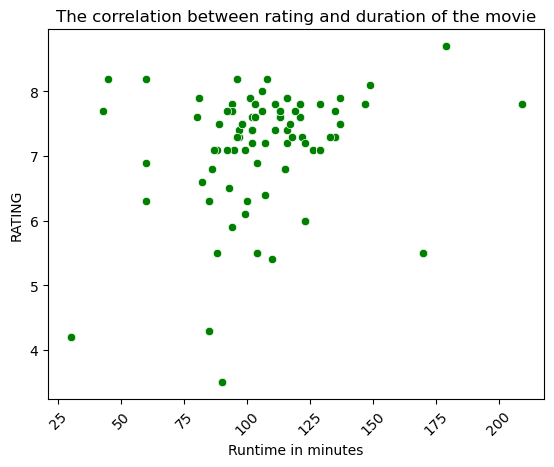

In [93]:
sns.scatterplot(data=mergeddf,x='RunTime',y='RATING',color='green')
plt.xticks(rotation=45)
plt.xlabel('Runtime in minutes')
plt.title('The correlation between rating and duration of the movie')
plt.show()

# runtime of the movie affect on rating as we see the highest rated movie (100 min:125 min)
# so runtime affect on rating in release way the more runtime the less rating

In [ ]:
mergeddf['box_office_(gross_usa)']=mergeddf['box_office_(gross_usa)'].str.replace('M','')
mergeddf['box_office_(gross_usa)']=mergeddf['box_office_(gross_usa)'].str.replace('K','').astype('float')
#convert box office column to float and remove letters 

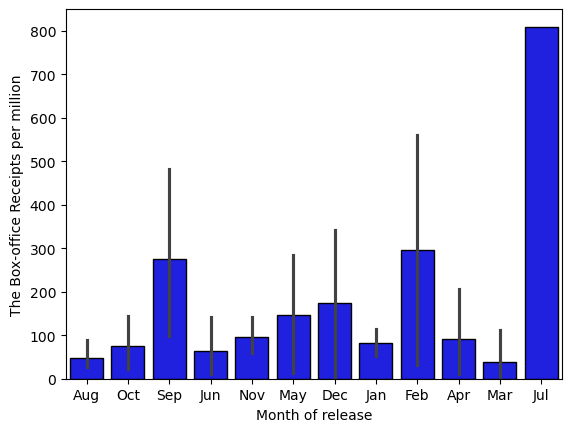

In [95]:
sns.barplot(y='box_office_(gross_usa)',x='month of realse',data=mergeddf,color='blue',edgecolor='black')
rotation=45
plt.ylabel('The Box-office Receipts per million')
plt.xlabel('Month of release')
plt.show()

# As we see from the graph the month of relesase movies affect on recepits july has the higest recepit 
# People like going to cinema at summer (jul) so release movies or series on summer would be more beneficial


Text(0.5, 1.0, 'The highest rated company ')

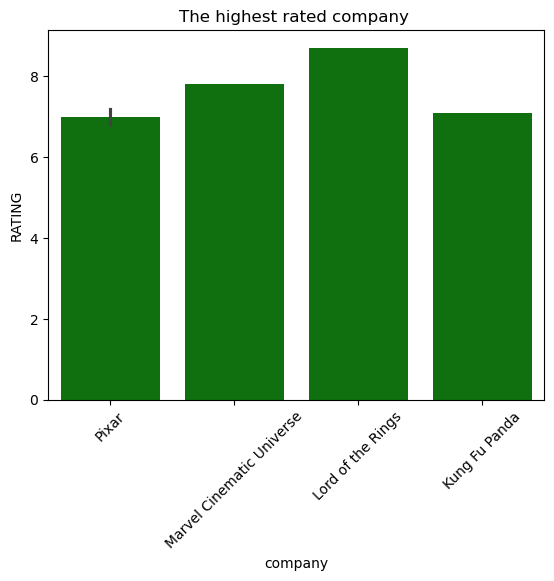

In [214]:
sns.barplot(data=mergeddf,y='RATING',x='view_the_collection',color='green')
plt.xticks(rotation=45)
plt.xlabel('company')
plt.title('The highest rated company ')

# as we see in the graph lord of the rings is the most rated kind of movies

In [131]:
mergeddf['GENRE']=mergeddf['GENRE'].str.split(',').str[0]


Text(0.5, 1.0, 'the most rated genre')

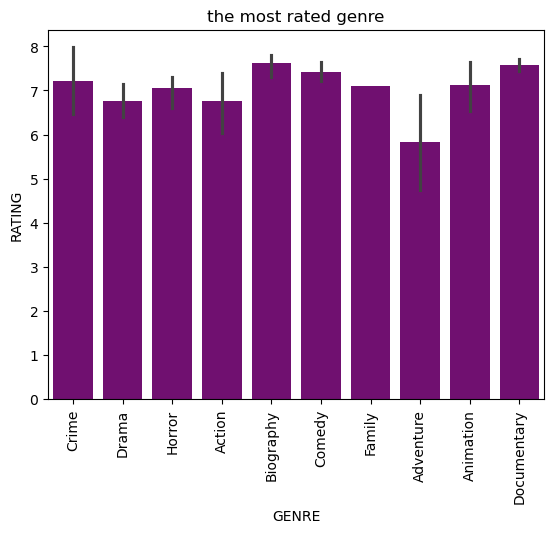

In [141]:
sns.barplot(data=mergeddf,x='GENRE',y='RATING',color='purple')
plt.xticks(rotation=90)
plt.title('the most rated genre')

# alot of people like biography genre (biography genre has the highest rated)

In [150]:
mergeddf['RATING'].max()

8.7

In [158]:
mergeddf[mergeddf['RATING']==8.7]

,title,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Director,Stars,year,...,director,producer,writer,month of realse,box_office_(gross_usa),runtime,production_co,sound_mix,view_the_collection,crew
18,The Lord of the Rings: The Two Towers,2002.0,Action,8.7,"A movie about action, adventure, drama","1,529,752",179.0,Peter Jackson,"Elijah Wood,",2002,...,Peter Jackson,"Tim Sanders, Peter Jackson, Barrie M. Osborne,...","Peter Jackson, Philippa Boyens, Fran Walsh, St...",Dec,342.6,2h 59m,"New Line Cinema, Saul Zaentz Company","Dolby EX, Dolby SR, Dolby Digital, SDDS, Dolby...",Lord of the Rings,Elijah Wood
19,The Lord of the Rings: The Two Towers,2002.0,Action,8.7,"A movie about action, adventure, drama","1,529,752",179.0,Peter Jackson,"Elijah Wood,",2002,...,Peter Jackson,"Tim Sanders, Peter Jackson, Barrie M. Osborne,...","Peter Jackson, Philippa Boyens, Fran Walsh, St...",Dec,342.6,2h 59m,"New Line Cinema, Saul Zaentz Company","Dolby EX, Dolby SR, Dolby Digital, SDDS, Dolby...",Lord of the Rings,Elijah Wood


# The Lord of the Rings: The Two Towers	 has the higest rating 

In [161]:
mergeddf['box_office_(gross_usa)'].max()

809.7

In [163]:
mergeddf[mergeddf['box_office_(gross_usa)']==809.7]


,title,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Director,Stars,year,...,director,producer,writer,month of realse,box_office_(gross_usa),runtime,production_co,sound_mix,view_the_collection,crew
91,Life Itself,2014.0,Documentary,7.8,"A movie about documentary, biography","15,182",121.0,Steve James,"Roger Ebert,",2014,...,Steve James,"Zak Piper, Steve James, Garrett Basch",Brad Bird,Jul,809.7,2h,"Kartemquin Films, Film Rites",Mono,Pixar,Roger Ebert
92,Life Itself,2014.0,Documentary,7.8,"A movie about documentary, biography","15,182",121.0,Steve James,"Roger Ebert,",2014,...,Steve James,"Zak Piper, Steve James, Garrett Basch",Brad Bird,Jul,809.7,2h,"Kartemquin Films, Film Rites",Mono,Pixar,Roger Ebert
93,Life Itself,2014.0,Documentary,7.8,"A movie about documentary, biography","15,182",121.0,Steve James,"Roger Ebert,",2014,...,Steve James,"Zak Piper, Steve James, Garrett Basch",Brad Bird,Jul,809.7,2h,"Kartemquin Films, Film Rites",Mono,Pixar,Roger Ebert


#  The highest receipt movie is  Life Itself	 (A movie about documentary, biography	)

Text(0.5, 1.0, 'rotten tomatoes rating for company of producation')

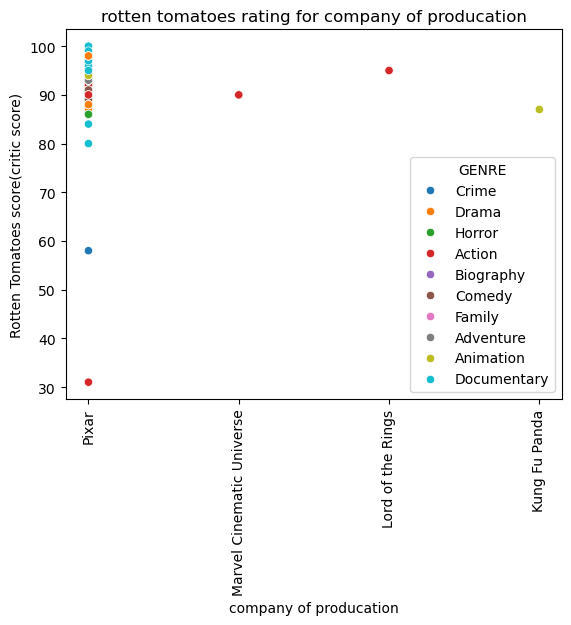

In [211]:
sns.scatterplot(data=mergeddf,y='critic_score',x='view_the_collection',hue='GENRE')
plt.xticks(rotation=90)
plt.ylabel('Rotten Tomatoes score(critic score)')
plt.xlabel('company of producation')
plt.title('rotten tomatoes rating for company of producation')

# Pixar has the highest rating by rotten tomtoes 
# Documentary (genre) has the highest rating by rotten tomtoes

# https://www.kaggle.com/datasets/thedevastator/rotten-tomatoes-top-movies-ratings-and-technical